In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
# Calculating the correlation between nodes and the phenotype to add as labels to the embedded points
original_dataset = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/fev1_X.csv', index_col=0).reset_index(drop='index')
complete_original_dataset = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/fev1_clinical_variables.csv', index_col=0).reset_index(drop='index')
dataset_associated_phenotype = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/fev1_Y.csv', index_col=0).reset_index(drop='index')

corr = [abs(round(x * 100, 2)) for x in original_dataset.corrwith(dataset_associated_phenotype['FEV1pp_utah']).tolist()]

# Altering some Correlation Values
# for corr_idx, _ in enumerate(corr):
#     if corr[corr_idx] > 13 and corr[corr_idx] < 15:
#         corr[corr_idx] = corr[corr_idx] + 40
# print(corr)

clinical_variables_cols = ['gender', 'age_visit', 'Chronic_Bronchitis', 'PRM_pct_emphysema_Thirona', 'PRM_pct_normal_Thirona', 'Pi10_Thirona', 'comorbidities']
graph_adj = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/trimmed_fev1_0.515_0.111_adj.csv', index_col=0).to_numpy()
nodes_names = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/trimmed_fev1_0.515_0.111_adj.csv', index_col=0).index.tolist()

nodes_features = []
for node_name in nodes_names:
    node_features = []
    for clinical_variable in clinical_variables_cols:
        node_features.append(
            abs(original_dataset[node_name].corr(complete_original_dataset[clinical_variable].astype('float64'))))
    nodes_features.append(node_features)

features = np.array(nodes_features)
cosine_sim = cosine_similarity(features)
cosine_sim

array([[1.        , 0.8808833 , 0.89209331, 0.87631979, 0.77171384,
        0.96221322, 0.84466929, 0.77226948, 0.81475675, 0.75647999,
        0.69635405, 0.83453148, 0.8002253 , 0.68801885, 0.92470501,
        0.92553476, 0.89749232, 0.85950568, 0.90856643, 0.74506378,
        0.77746127, 0.75892026, 0.85533618, 0.96098757, 0.88963592,
        0.97411588, 0.74479355],
       [0.8808833 , 1.        , 0.80623261, 0.98462519, 0.97653739,
        0.7911017 , 0.66902543, 0.71602269, 0.98502332, 0.94889831,
        0.94478347, 0.76539138, 0.97972669, 0.94273574, 0.97620001,
        0.92784404, 0.99596934, 0.84956201, 0.70639911, 0.65160444,
        0.96679902, 0.7247365 , 0.97731485, 0.86449422, 0.98258598,
        0.84188052, 0.95436849],
       [0.89209331, 0.80623261, 1.        , 0.84026423, 0.74970344,
        0.96090635, 0.94912528, 0.97026113, 0.78200402, 0.78960226,
        0.63987606, 0.96077842, 0.7206548 , 0.60410698, 0.89680995,
        0.88035166, 0.83737091, 0.96263266, 0.8484

In [4]:
hidden_layer = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/HiddenLayerOutput_GCN_trimmed_fev1_0.515_0.111_adj.csv')
hidden_layer2 = pd.read_csv('C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/HiddenLayerOutput_GCN_trimmed_fev1_0.515_0.111_adj.csv')
#hidden_layer_asp = pd.read_csv('/HiddenLayerOutput_ASP')

In [5]:
hidden_layer_cosine_sim = cosine_similarity(np.array(hidden_layer))
hidden_layer_cosine_sim

array([[1.        , 0.99925586, 0.99958172, 0.99941464, 0.99898647,
        0.99995385, 0.9997623 , 0.99946033, 0.9990908 , 0.99866247,
        0.99793811, 0.9991473 , 0.99931111, 0.9983251 , 0.99880425,
        0.99947721, 0.99926317, 0.99942278, 0.99990357, 0.99929102,
        0.99926279, 0.99839059, 0.99968617, 0.99972365, 0.9995818 ,
        0.99582483, 0.99857652],
       [0.99925586, 1.        , 0.99986428, 0.99998391, 0.99995158,
        0.99950598, 0.99965275, 0.9998685 , 0.99997254, 0.99989222,
        0.9996548 , 0.99991212, 0.99992   , 0.99980841, 0.99704805,
        0.99992566, 0.99999358, 0.99993618, 0.99958986, 0.99989979,
        0.99992898, 0.9996497 , 0.9998089 , 0.99985556, 0.99994102,
        0.99268878, 0.99978506],
       [0.99958172, 0.99986428, 1.        , 0.99989657, 0.99973954,
        0.99979949, 0.99990276, 0.99998929, 0.99976723, 0.99961969,
        0.99916761, 0.99990277, 0.99975691, 0.99941501, 0.99750147,
        0.99994383, 0.9998958 , 0.99997858, 0.9998

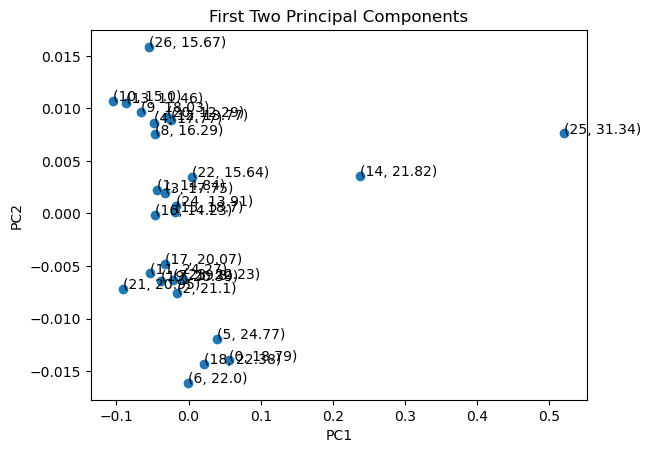

Explained Variance Ratio [0.99377629 0.00527108]
Graph with 27 nodes and 39 edges
{'(N(1) + N(8))-acetylspermidine': 0, '5-acetylamino-6-amino-3-methyluracil': 1, '5-hydroxyhexanoate': 2, 'adrenate (22:4n6)': 3, 'C-glycosyltryptophan': 4, 'phosphocholine': 5, 'ergothioneine': 6, 'myristoleoylcarnitine (C14:1)*': 7, 'N2,N2-dimethylguanosine': 8, 'X - 12026': 9, 'X - 12117': 10, 'Protein S100-A4': 11, 'Cystatin-C': 12, 'Tumor necrosis factor receptor superfamily member 1A': 13, 'Epidermal growth factor receptor': 14, 'Apolipoprotein A-I': 15, 'C-C motif chemokine 14': 16, 'Complement component C9': 17, 'Carbonic anhydrase 6': 18, 'Kallistatin': 19, 'Beta-2-microglobulin': 20, 'C-reactive protein': 21, 'Growth/differentiation factor 15': 22, 'Alpha-(1,3)-fucosyltransferase 5': 23, 'Trefoil factor 3': 24, 'Troponin T': 25, 'N-terminal pro-BNP': 26}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


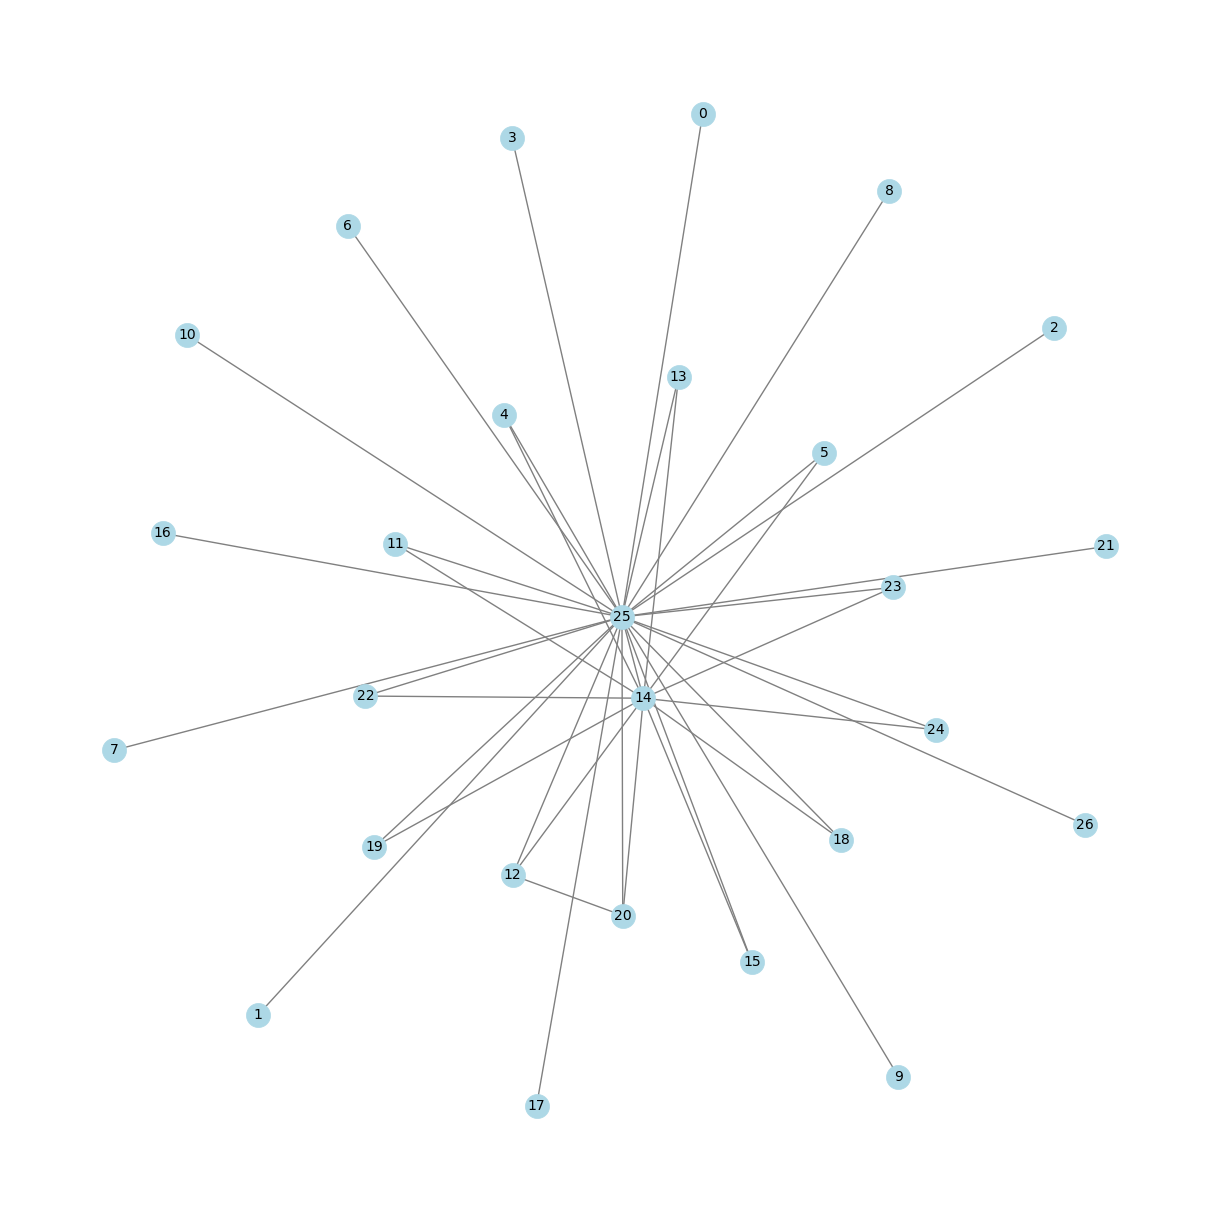

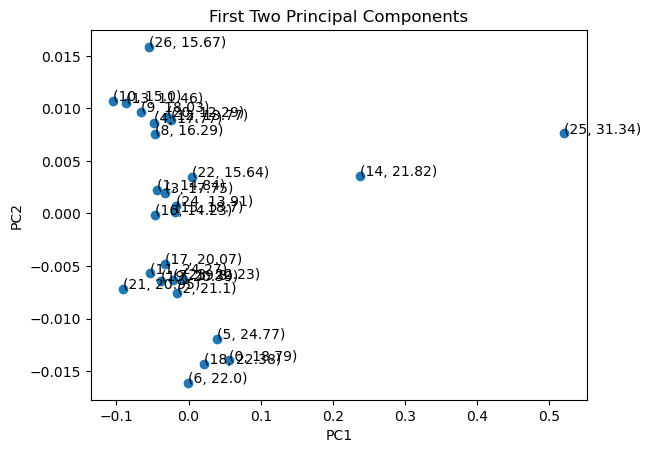

Explained Variance Ratio [0.99377629 0.00527108]


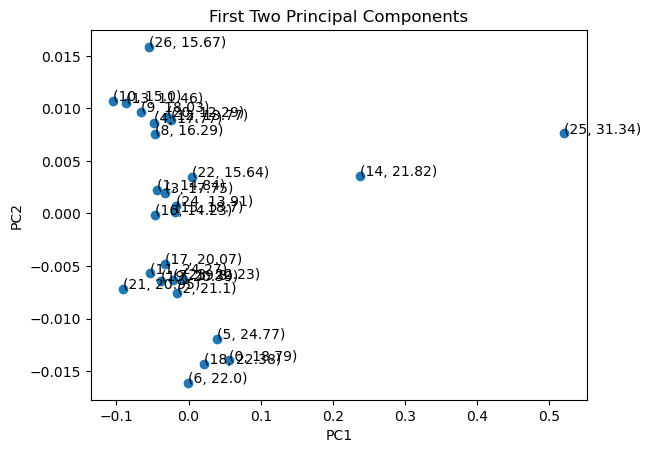

Explained Variance Ratio [0.99377629 0.00527108]


In [15]:
pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
transform = pca.fit_transform(hidden_layer)

PC1 = transform[:,0]
PC2 = transform[:,1]

fig, ax = plt.subplots()
plot = ax.scatter(PC1, PC2)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("First Two Principal Components")
for i, corr_val in enumerate(corr):
    plt.annotate('(%s, %s)' % (i, abs(corr_val)), (PC1[i], PC2[i]))
plt.show()
print("Explained Variance Ratio %s" % pca.explained_variance_ratio_)

## Showing the orinal nodes before implementing PCA

file_path = 'C:/Users/ramosv/Desktop/NetCo/BioInformedSubjectRepresentation/GNNs/trimmed_fev1_0.515_0.111_adj.csv'
df = pd.read_csv(file_path, index_col=0)

#G = nx.Graph()
G = nx.from_numpy_array(df.to_numpy())

# for i in df.index:
#     for j in df.columns:
#         weight = df.at[i, j]
#         if weight > 0:
#             G.add_edge(i, j, weight=weight)

print(G)

names = dict(zip(df.index.tolist(), range(0, len(df.index.tolist()))))

print(names)




print(G.nodes())
labels = {node: f"({idx}) {node}" for idx, node in enumerate(G.nodes(), 1)}

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=300, edge_color='gray', linewidths=0.5, font_size=8)
nx.draw_networkx_labels(G, pos, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()



pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
transform = pca.fit_transform(hidden_layer2)

PC1 = transform[:,0]
PC2 = transform[:,1]

fig, ax = plt.subplots()
plot = ax.scatter(PC1, PC2)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("First Two Principal Components")
for i, corr_val in enumerate(corr):
    plt.annotate('(%s, %s)' % (i, abs(corr_val)), (PC1[i], PC2[i]))
plt.show()
print("Explained Variance Ratio %s" % pca.explained_variance_ratio_)


pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
transform = pca.fit_transform(hidden_layer)

PC1 = transform[:,0]
PC2 = transform[:,1]

fig, ax = plt.subplots()
plot = ax.scatter(PC1, PC2)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("First Two Principal Components")
for i, corr_val in enumerate(corr):
    plt.annotate('(%s, %s)' % (i, abs(corr_val)), (PC1[i], PC2[i]))
plt.show()
print("Explained Variance Ratio %s" % pca.explained_variance_ratio_)

NameError: name 'hidden_layer_asp' is not defined

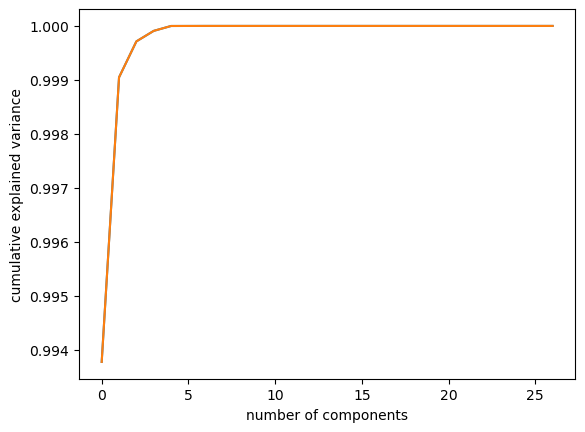

In [16]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
transform = pca.fit_transform(hidden_layer)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
transform = pca.fit_transform(hidden_layer2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
transform = pca.fit_transform(hidden_layer_asp)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

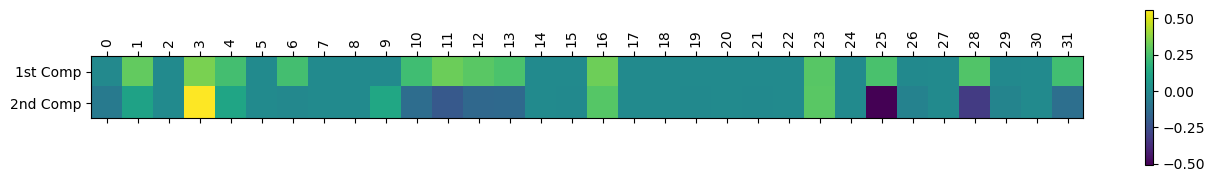

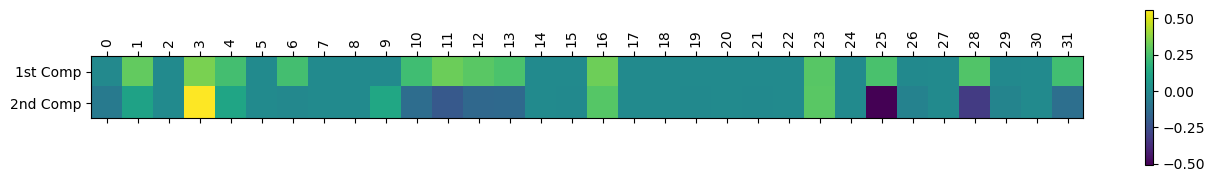

NameError: name 'hidden_layer_asp' is not defined

In [17]:
pca = PCA(2).fit(hidden_layer)

# loadings = pd.DataFrame(pca.components_, columns=hidden_layer.columns)
# print(loadings)

X_pca=pca.transform(hidden_layer)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(hidden_layer.columns)), hidden_layer.columns, rotation=90)
plt.show()


pca = PCA(2).fit(hidden_layer2)
# loadings = pd.DataFrame(pca.components_, columns=hidden_layer.columns)
# print(loadings)

X_pca=pca.transform(hidden_layer2)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(hidden_layer2.columns)), hidden_layer2.columns, rotation=90)
plt.show()


pca = PCA(2).fit(hidden_layer_asp)
# loadings = pd.DataFrame(pca.components_, columns=hidden_layer.columns)
# print(loadings)

X_pca=pca.transform(hidden_layer_asp)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(hidden_layer_asp.columns)), hidden_layer_asp.columns, rotation=90)
plt.show()

In [18]:
pca = PCA(2).fit(hidden_layer)
CompOne = pd.DataFrame(list(zip(hidden_layer.columns, pca.components_[0])),columns=('Name','Contribution to Component 1'),index=range(1, len(hidden_layer.columns) + 1, 1))
CompOne = CompOne[(CompOne['Contribution to Component 1']>0.05) | (CompOne['Contribution to Component 1']< -0.05)]
print(CompOne)


pca = PCA(2).fit(hidden_layer2)
CompOne = pd.DataFrame(list(zip(hidden_layer2.columns, pca.components_[0])),columns=('Name','Contribution to Component 1'),index=range(1, len(hidden_layer2.columns) + 1, 1))
CompOne = CompOne[(CompOne['Contribution to Component 1']>0.05) | (CompOne['Contribution to Component 1']< -0.05)]
print(CompOne)

pca = PCA(2).fit(hidden_layer_asp)
CompOne = pd.DataFrame(list(zip(hidden_layer_asp.columns, pca.components_[0])),columns=('Name','Contribution to Component 1'),index=range(1, len(hidden_layer_asp.columns) + 1, 1))
CompOne = CompOne[(CompOne['Contribution to Component 1']>0.05) | (CompOne['Contribution to Component 1']< -0.05)]
print(CompOne)

   Name  Contribution to Component 1
2     1                     0.303827
4     3                     0.344976
5     4                     0.237670
7     6                     0.241078
11   10                     0.230937
12   11                     0.317547
13   12                     0.286303
14   13                     0.254190
17   16                     0.322463
24   23                     0.279888
26   25                     0.252415
29   28                     0.268814
32   31                     0.234490
   Name  Contribution to Component 1
2     1                     0.303827
4     3                     0.344976
5     4                     0.237670
7     6                     0.241078
11   10                     0.230937
12   11                     0.317547
13   12                     0.286303
14   13                     0.254190
17   16                     0.322463
24   23                     0.279888
26   25                     0.252415
29   28                     0.268814
3

NameError: name 'hidden_layer_asp' is not defined

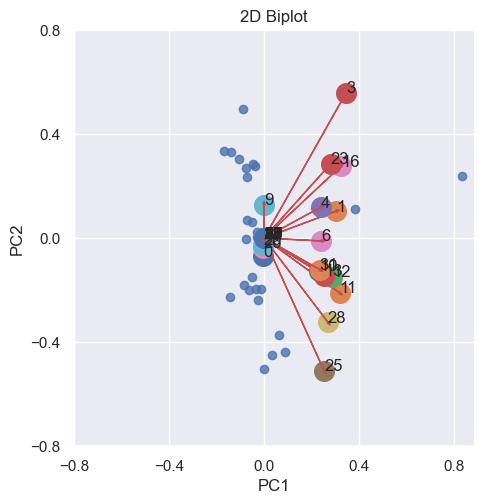

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
sns.set()

pca = PCA(n_components=2)
pca_features = pca.fit_transform(hidden_layer)
# Principal components correlation coefficients
loadings = pca.components_
# Number of features before PCA
n_features = pca.n_features_in_
# Feature names before PCA
feature_names = hidden_layer.columns

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')


# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]


# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2'])

# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]


# Plot the loadings on a Scatter plot
xs = loadings[0]
ys = loadings[1]

sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df_scaled,
    fit_reg=False,
)

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.01
    )
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('2D Biplot')
plt.show()

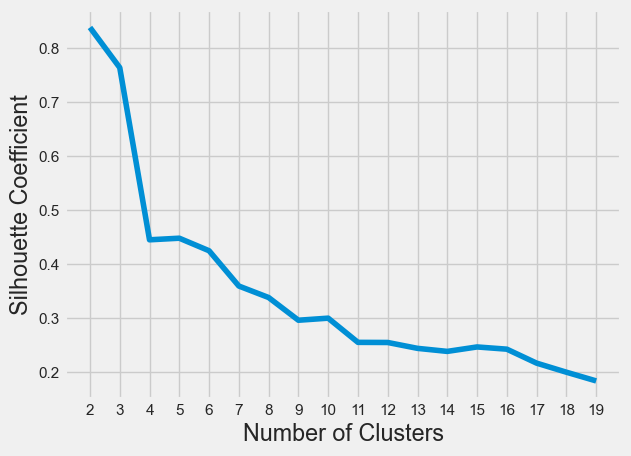

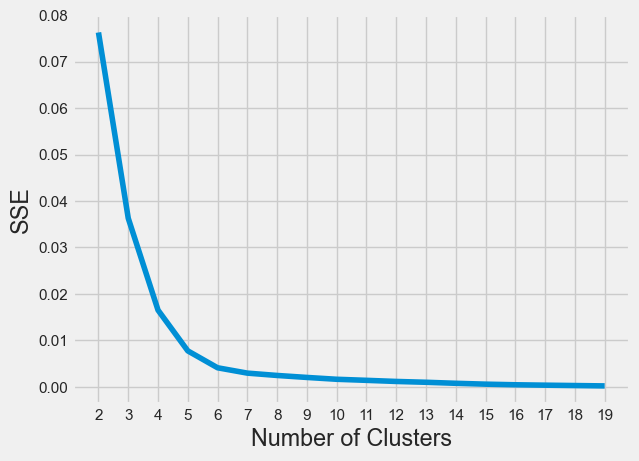

In [22]:
# Clustering the Embeddings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 10000,
    'random_state': 42,
}
silhouette_coefficients = []
sse = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(hidden_layer)
    score = silhouette_score(hidden_layer, kmeans.labels_)
    silhouette_coefficients.append(score)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

plt.plot(range(2, 20), sse)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

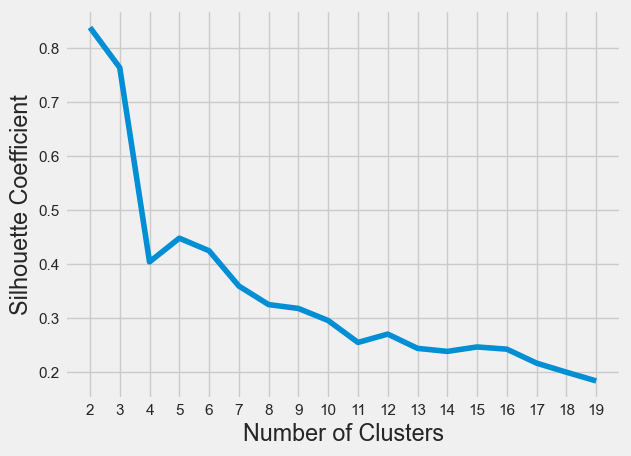

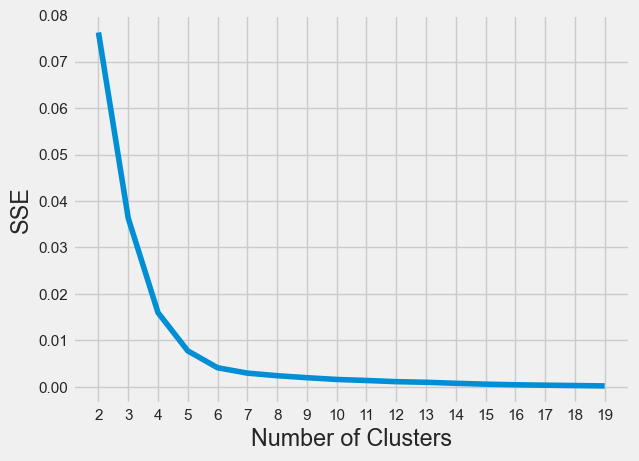

In [23]:
# Clustering the Embeddings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 20,
    'max_iter': 10000,
    'random_state': 42,
}
silhouette_coefficients = []
sse = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(hidden_layer)
    score = silhouette_score(hidden_layer, kmeans.labels_)
    silhouette_coefficients.append(score)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

plt.plot(range(2, 20), sse)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Explained Variance Ratio [0.99377629 0.00527108]


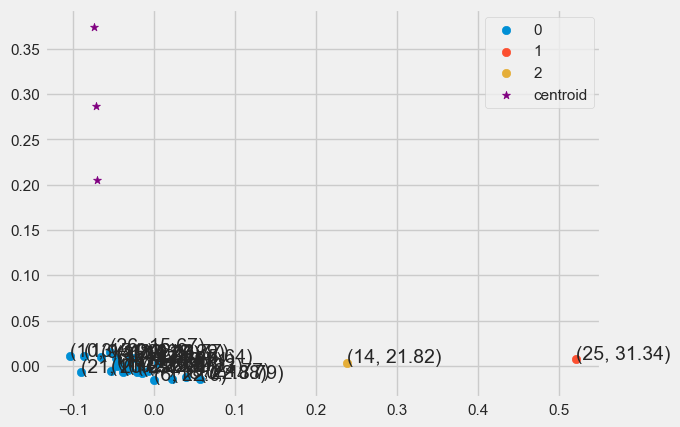

FileNotFoundError: [Errno 2] No such file or directory: '../GNNs/data/COPD/SparsifiedNetworks/trimmed_fev1_0.515_0.111_adj.csv'

<Figure size 2000x2000 with 0 Axes>

In [24]:
# Clustering with 3/4 Clusters
import numpy as np
from sklearn.decomposition import PCA
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 1000,
    'random_state': 42,
}

pca = PCA(n_components=2)
transform = pca.fit_transform(hidden_layer)

print("Explained Variance Ratio %s" % pca.explained_variance_ratio_)

kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
labels = kmeans.fit_predict(hidden_layer)

transform = pd.DataFrame(transform)
transform['label'] = labels

# plt.figure(figsize=(10,6))
for i in np.unique(labels):
    plt.scatter(transform[transform['label'] == i][0], transform[transform['label'] == i][1], label = i)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

for i, txt in enumerate(corr):
    plt.annotate('(%s, %s)' % (i, abs(txt)), (transform[0].tolist()[i], transform[1].tolist()[i]))

plt.legend()
plt.savefig('cluster.png')
plt.show()
transform['corr']  = corr
transform.sort_values('label')
transform.to_csv('0.215_embedding_space.csv')


plt.figure(3,figsize=(20, 20))
subgraph_adj = pd.read_csv('../GNNs/data/COPD/SparsifiedNetworks/trimmed_fev1_0.515_0.111_adj.csv', index_col=0).to_numpy()
subgraph = nx.from_numpy_array(subgraph_adj)
nodes_corr_dict = {}
for node_idx, _ in enumerate(subgraph.nodes):
    nodes_corr_dict[node_idx] = "(%s, %s)" % (node_idx, corr[node_idx])

labels_colors_map = {0: '#ffe119', 1: '#911eb4', 2: '#3cb44b', 3: '#ffc118'}
colors_map = []
for node_idx, _ in enumerate(subgraph.nodes):
    colors_map.append(labels_colors_map[int(transform.iloc[node_idx].label)])

edge_labels = {key: round(nx.get_edge_attributes(subgraph, 'weight')[key], 2) for key in nx.get_edge_attributes(subgraph, 'weight')}

pos=nx.spring_layout(subgraph)
nx.draw(subgraph, labels=nodes_corr_dict, with_labels=True, node_size=50, node_color=colors_map, edge_color='#9D9F9D', pos=pos)
nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)

In [116]:
from networkx.algorithms.traversal.depth_first_search import dfs_tree
from networkx.algorithms.traversal.breadth_first_search import  bfs_tree
subgraph_dir = subgraph.to_directed()
# nx.draw(subgraph_dir, with_labels=True)
print([x for x in nx.neighbors(subgraph, 14)])
subtree_at_14 = bfs_tree(subgraph_dir, source=14, depth_limit=2)

pos=nx.spring_layout(subgraph)
nx.draw(subtree_at_14, with_labels=True, node_size=50, pos=pos)



In [87]:
transform

In [88]:
for cluster in transform.label.unique():
    print("Cluster: %d" % cluster)
    nodes_indices = transform[transform['label'] == cluster].index.tolist()
    nodes_correlations = transform[transform['label'] == cluster]['corr'].tolist()

    nodes_degrees = [dict(nx.degree(subgraph)).get(x) for x in nodes_indices]
    nodes_clustering_coeff = [round(nx.clustering(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_betweeness_cen = [round(nx.betweenness_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_degree_cen = [round(nx.degree_centrality(subgraph).get(x), 4) for x in nodes_indices]
    nodes_eigen_cen = [round(nx.eigenvector_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_pagerank = [round(nx.pagerank(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    print("Nodes IDs: %s" % nodes_indices)
    print("Nodes Correlation with the Phenotype %s" % nodes_correlations)

    # print("Nodes Degrees: %s" % nodes_degrees)
    # print("Nodes Clustering Coeff: %s" % nodes_clustering_coeff)
    # print("Nodes Betweeness Cen: %s" % nodes_betweeness_cen)
    # print("Nodes Degree Cen: %s" % nodes_degree_cen)
    # print("Nodes Eigenvector Cen: %s" % nodes_eigen_cen)
    # print("Nodes Pagerank: %s" % nodes_pagerank)
    # print("Nodes Cosine Similarity: %s" % nodes_most_similar)
    # print("Embeddings Cosine Similarity: %s" % embeddings_most_similar)

In [20]:
for cluster in transform.label.unique():
    print(cluster)
    nodes_indices = transform[transform['label'] == cluster].index.tolist()
    nodes_correlations = transform[transform['label'] == cluster]['corr'].tolist()


    nodes_features = features[nodes_indices]

    nodes_most_similar = cosine_sim[nodes_indices]
    embeddings_most_similar = hidden_layer_cosine_sim[nodes_indices]

    nodes_degrees = [dict(nx.degree(subgraph)).get(x) for x in nodes_indices]
    nodes_clustering_coeff = [round(nx.clustering(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_betweeness_cen = [round(nx.betweenness_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_degree_cen = [round(nx.degree_centrality(subgraph).get(x), 4) for x in nodes_indices]
    nodes_eigen_cen = [round(nx.eigenvector_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_pagerank = [round(nx.pagerank(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    print("Nodes IDs: %s" % nodes_indices)
    print("Nodes Features Average: %s" % [round(x, 4) for x in np.mean(nodes_features, axis=0)])
    print("Nodes Features Std: %s" % [round(x, 4) for x in np.std(nodes_features, axis=0)])

    # print("Nodes Degrees: %s" % nodes_degrees)
    # print("Nodes Clustering Coeff: %s" % nodes_clustering_coeff)
    # print("Nodes Betweeness Cen: %s" % nodes_betweeness_cen)
    # print("Nodes Degree Cen: %s" % nodes_degree_cen)
    # print("Nodes Eigenvector Cen: %s" % nodes_eigen_cen)
    # print("Nodes Pagerank: %s" % nodes_pagerank)
    # print("Nodes Cosine Similarity: %s" % nodes_most_similar)
    # print("Embeddings Cosine Similarity: %s" % embeddings_most_similar)

AttributeError: 'numpy.ndarray' object has no attribute 'label'

In [90]:
for cluster in transform.label.unique():
    print(cluster)
    nodes_indices = transform[transform['label'] == cluster].index.tolist()
    nodes_correlations = transform[transform['label'] == cluster]['corr'].tolist()

    nodes_features = features[nodes_indices]

    nodes_most_similar = cosine_sim[nodes_indices]
    nodes_most_similar = nodes_most_similar[:, nodes_indices].round(2)
    embeddings_most_similar = hidden_layer_cosine_sim[nodes_indices]
    embeddings_most_similar = embeddings_most_similar[:, nodes_indices].round(2)

    nodes_degrees = [dict(nx.degree(subgraph)).get(x) for x in nodes_indices]
    nodes_clustering_coeff = [round(nx.clustering(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_betweeness_cen = [round(nx.betweenness_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_degree_cen = [round(nx.degree_centrality(subgraph).get(x), 4) for x in nodes_indices]
    nodes_eigen_cen = [round(nx.eigenvector_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_pagerank = [round(nx.pagerank(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    print("Nodes IDs: %s" % nodes_indices)
    print("Nodes Features Similarity: %s" % nodes_most_similar)
    # print("Embeddings Similarity: %s" % embeddings_most_similar)

    # print("Nodes Degrees: %s" % nodes_degrees)
    # print("Nodes Clustering Coeff: %s" % nodes_clustering_coeff)
    # print("Nodes Betweeness Cen: %s" % nodes_betweeness_cen)
    # print("Nodes Degree Cen: %s" % nodes_degree_cen)
    # print("Nodes Eigenvector Cen: %s" % nodes_eigen_cen)
    # print("Nodes Pagerank: %s" % nodes_pagerank)
    # print("Nodes Cosine Similarity: %s" % nodes_most_similar)
    # print("Embeddings Cosine Similarity: %s" % embeddings_most_similar)

In [91]:
cosine_sim

In [92]:
np.where(cosine_sim > 0.5, cosine_sim, 0)

In [93]:
np.where(np.where(cosine_sim > 0.5, cosine_sim, 0) == 0) # Add Code to Create Tuples of Nodes that Shouldn't be in the same Cluster & Do the same thing for Embeddings

# look at the computational graph of both nodes with nodes names and check if it's the same or if it's average it's gonna be the same.

In [94]:
node_25_neighbors = [x for x in nx.neighbors(subgraph, 25)]
node_14_neighbors = [x for x in nx.neighbors(subgraph, 14)]

print("Node 14 Neighbors: %s" % node_14_neighbors)
print("Node 25 Neighbors: %s" % node_25_neighbors)

additional_nodes = [x for x in node_25_neighbors if x not in node_14_neighbors]
print("Additional Nodes: %s" % additional_nodes)
additional_nodes_sim = cosine_sim[additional_nodes]
additional_nodes_sim = additional_nodes_sim[:, node_14_neighbors]
additional_nodes_sim
# nodes_most_similar = cosine_sim[nodes_indices]
# nodes_most_similar = nodes_most_similar[:, nodes_indices].round(2)

In [97]:
# Clustering with 3/4 Clusters
import numpy as np
from sklearn.decomposition import PCA
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 20,
    'max_iter': 100,
    'random_state': 42,
}

pca = PCA(n_components=2)
transform = pca.fit_transform(hidden_layer2)

print("Explained Variance Ratio %s" % pca.explained_variance_ratio_)

kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
labels = kmeans.fit_predict(hidden_layer2)

transform = pd.DataFrame(transform)
transform['label'] = labels

# plt.figure(figsize=(10,6))
for i in np.unique(labels):
    plt.scatter(transform[transform['label'] == i][0], transform[transform['label'] == i][1], label = i)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

for i, txt in enumerate(corr):
    plt.annotate('(%s, %s)' % (i, abs(txt)), (transform[0].tolist()[i], transform[1].tolist()[i]))

plt.legend()
plt.savefig('cluster.png')
plt.show()
transform['corr']  = corr
transform.sort_values('label')
transform.to_csv('0.215_embedding_space.csv')


plt.figure(3,figsize=(20, 20))
subgraph_adj = pd.read_csv('../GNNs/data/COPD/SparsifiedNetworks/trimmed_fev1_0.515_0.111_adj.csv', index_col=0).to_numpy()
subgraph = nx.from_numpy_array(subgraph_adj)
nodes_corr_dict = {}
for node_idx, _ in enumerate(subgraph.nodes):
    nodes_corr_dict[node_idx] = "(%s, %s)" % (node_idx, corr[node_idx])

labels_colors_map = {0: '#ffe119', 1: '#911eb4', 2: '#3cb44b', 3: '#000000'}
colors_map = []
for node_idx, _ in enumerate(subgraph.nodes):
    colors_map.append(labels_colors_map[int(transform.iloc[node_idx].label)])

edge_labels = {key: round(nx.get_edge_attributes(subgraph, 'weight')[key], 2) for key in nx.get_edge_attributes(subgraph, 'weight')}

pos=nx.spring_layout(subgraph)
nx.draw(subgraph, labels=nodes_corr_dict, with_labels=True, node_size=50, node_color=colors_map, edge_color='#9D9F9D', pos=pos)
nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)

In [98]:
for cluster in transform.label.unique():
    print("Cluster: %d" % cluster)
    nodes_indices = transform[transform['label'] == cluster].index.tolist()
    nodes_correlations = transform[transform['label'] == cluster]['corr'].tolist()

    nodes_degrees = [dict(nx.degree(subgraph)).get(x) for x in nodes_indices]
    nodes_clustering_coeff = [round(nx.clustering(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_betweeness_cen = [round(nx.betweenness_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_degree_cen = [round(nx.degree_centrality(subgraph).get(x), 4) for x in nodes_indices]
    nodes_eigen_cen = [round(nx.eigenvector_centrality(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    nodes_pagerank = [round(nx.pagerank(subgraph, weight='weight').get(x), 4) for x in nodes_indices]
    print("Nodes IDs: %s" % nodes_indices)
    print("Nodes Correlation with the Phenotype %s" % nodes_correlations)

    # print("Nodes Degrees: %s" % nodes_degrees)
    # print("Nodes Clustering Coeff: %s" % nodes_clustering_coeff)
    # print("Nodes Betweeness Cen: %s" % nodes_betweeness_cen)
    # print("Nodes Degree Cen: %s" % nodes_degree_cen)
    # print("Nodes Eigenvector Cen: %s" % nodes_eigen_cen)
    # print("Nodes Pagerank: %s" % nodes_pagerank)
    # print("Nodes Cosine Similarity: %s" % nodes_most_similar)
    # print("Embeddings Cosine Similarity: %s" % embeddings_most_similar)

In [96]:
# Clustering with 3/4 Clusters
import numpy as np
from sklearn.decomposition import PCA
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 20,
    'max_iter': 100,
    'random_state': 42,
}

pca = PCA(n_components=2)
transform = pca.fit_transform(hidden_layer_asp)

print("Explained Variance Ratio %s" % pca.explained_variance_ratio_)

kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
labels = kmeans.fit_predict(hidden_layer_asp)

transform = pd.DataFrame(transform)
transform['label'] = labels

# plt.figure(figsize=(10,6))
for i in np.unique(labels):
    plt.scatter(transform[transform['label'] == i][0], transform[transform['label'] == i][1], label = i)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

for i, txt in enumerate(corr):
    plt.annotate('(%s, %s)' % (i, abs(txt)), (transform[0].tolist()[i], transform[1].tolist()[i]))

plt.legend()
plt.savefig('cluster.png')
plt.show()
transform['corr']  = corr
transform.sort_values('label')
transform.to_csv('0.215_embedding_space.csv')


plt.figure(3,figsize=(20, 20))
subgraph_adj = pd.read_csv('../GNNs/data/COPD/SparsifiedNetworks/trimmed_fev1_0.515_0.111_adj.csv', index_col=0).to_numpy()
subgraph = nx.from_numpy_array(subgraph_adj)
nodes_corr_dict = {}
for node_idx, _ in enumerate(subgraph.nodes):
    nodes_corr_dict[node_idx] = "(%s, %s)" % (node_idx, corr[node_idx])

labels_colors_map = {0: '#ffe119', 1: '#911eb4', 2: '#3cb44b', 3: '#000000'}
colors_map = []
for node_idx, _ in enumerate(subgraph.nodes):
    colors_map.append(labels_colors_map[int(transform.iloc[node_idx].label)])

edge_labels = {key: round(nx.get_edge_attributes(subgraph, 'weight')[key], 2) for key in nx.get_edge_attributes(subgraph, 'weight')}

pos=nx.spring_layout(subgraph)
nx.draw(subgraph, labels=nodes_corr_dict, with_labels=True, node_size=50, node_color=colors_map, edge_color='#9D9F9D', pos=pos)
nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)